>### Name : Weerasinghe K.N. <br>Index No : 190672T

In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt
import scipy

NameError: name 'cand_circ' is not defined

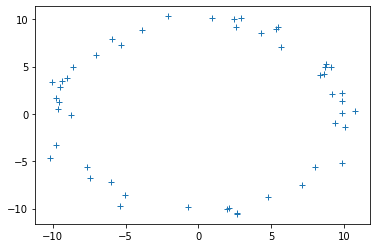

In [2]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn (half_n)
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = 1,2
plt.plot(x,y,"+",label="noisy channel")
x1 = np.linspace(-12,12,half_n)
y1 = m*x+b+s*np.random.randn(half_n)
X_line = np.hstack((x1.reshape(half_n,1),y1.reshape(half_n,1)))
X = np.round(np.vstack((X_circ,X_line)),4)

def get_circle(x1,y1,x2,y2,x3,y3):
    x12 = x1-x2
    x13 = x1-x3
    y12 = y1-y2
    y13 = y1 - y3
 
    y31 = y3-y1
    y21 = y2-y1
 
    x31 = x3-x1
    x21 = x2-x1
 
    sx13 = pow(x1, 2) - pow(x3, 2)
    sy13 = pow(y1, 2) - pow(y3, 2)
    sx21 = pow(x2, 2) - pow(x1, 2)
    sy21 = pow(y2, 2) - pow(y1, 2)
 
    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) // (2 *
          ((y31) * (x12) - (y21) * (x13))))
             
    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) //
          (2 * ((x31) * (y12) - (x21) * (y13))))
 
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1)

    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c
 
    r = round(sqrt(sqr_of_r), 5)
    return(h,k,r)

def RANSAC_circ(X,thrsh):
    inliners_max=[]
    def T_check():
        return np.sqrt()
    for i in range(len(X)-2):
        for j in range(i+1,len(X)-1):
            for k in range(j+1,len(X)):
                inliners=[]
                C=get_circ(X[i][0],X[i][1],X[j][0],X[j][1],X[k][0],X[k][1])


def RNASAC_circ(X , thrsh, inliner_min, iterations_max, N, r_e):
    n=0                    #this variable holds the number of iterations in the loop
    inliner_details=[]     

    def random_num_gen():
          return [np.random.randint(0,N) for i in range(3)]

    while (iterations_max>n):
        a, b, c = random_num_gen()
        xs, ys, r_s =  get_circle(X[a,0],X[a,1],X[b,0],X[b,1],X[c,0],X[c,1])

        if (r_s- r_e)> 2*thrsh or (r_s- r_e)< -2*thrsh:
            n+=1
            continue
        err_array = (np.sqrt((np.square(X[:,0].reshape(N,1) - xs))+(np.square(X[:,1].reshape(N,1) - ys))) - r)**2

        thrsh_sq = thrsh**2
 
        inliners=[]
        
        for i in range(N):
            if (err_array[i]<= thrsh_sq):
                inliners.append(list(X[i]))
        num_inliners= len(inliners)
        if (num_inliners < inliner_min):
            n+=1
            continue
        x_ca , y_ca, R_ca = cand_circ(np.array(inliners))
        inliner_err=0
        inliners =  []
        err_array_with_candidate = np.square(np.sqrt((np.square(X[:,0].reshape(N,1) - x_ca))+(np.square(X[:,1].reshape(N,1) - y_ca))) - R_ca)
        for i in range(N):
            if (err_array_with_candidate[i]<= thrsh_sq):
                inliners.append(list(X[i]))
                inliner_err += err_array_with_candidate[i]
        num_inliners= len(inliners)
        mean_err = inliner_err/num_inliners
        if (num_inliners < inliner_min):
            n+=1
            continue
        inliner_details.append([num_inliners, mean_err, inliners, [x_ca,y_ca,R_ca], [a,b,c], [x_ca, y_ca,r]])
        n+=1
    return inliner_details

best_index=0
max_inliners=0
min_err=1000
iterations =100
threshold =1
Min_Inliers_limit = 40

inliner_list = RNASAC_circ(X, threshold, Min_Inliers_limit,iterations,N, r)
for i in range(len(inliner_list)-1):
    if (max_inliners < inliner_list[i][0]):
        max_inliners= inliner_list[i][0]
        min_err = inliner_list[i][1]
        best_index = i
    elif (max_inliners == inliner_list[i][0]) and (min_err > inliner_list[i][1]):
        min_err = inliner_list[i][1]
        best_index = i

# seperate plotting points

inliners = inliner_list[best_index][2]
outliners =[]
for i in range(N):
    if (list(X[i]) not in inliners) :
        outliners.append(list(X[i]))
best_samples =[list(X[inliner_list[best_index][4][0]]), list(X[inliner_list[best_index][4][1]]), list(X[inliner_list[best_index][4][2]])]


for i in range(3):
    inliners.remove(best_samples[i])
    
#ploting
#ploting the dot diagrams
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(np.array(outliners)[:,0],np.array(outliners)[:,1],s= np.ones(len(outliners))*30 , color= 'blue', label = 'Outliers')
plt.scatter(np.array(inliners)[:,0],np.array(inliners)[:,1],s= np.ones(len(inliners))*30, color= 'green', label = 'Inliers')
plt.scatter(np.array(best_samples)[:,0],np.array(best_samples)[:,1],s= np.ones(len(best_samples))*30 , color= 'red', label = 'Bestsample')
#ploting circles
x_cc,y_cc,R_c = inliner_list[best_index][3]
RANSAC_circle = plt.Circle((x_cc , y_cc), R_c, fill=False , color = 'red' ,label='RANSAC')
ax.add_artist(RANSAC_circle)

x_c, y_c, r = inliner_list[best_index][5]
Best_Sample_circle = plt.Circle((x_c , y_c), r, fill=False , color = 'blue' ,label='Best Sample')
ax.add_artist(Best_Sample_circle)

plt.legend()